In [2]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vitualization
import seaborn as sns

# transformation
import scipy

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# data prepossessing, PCA , kmean and Hierarchy dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize

# features engineering
from sklearn.preprocessing import PolynomialFeatures

# gradient boost decision trees
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix

In [3]:
# load dataset
Train_data = pd.read_csv("ML/application_train.csv")
"""Test_data = pd.read_csv("ML/application_test.csv")
Bureau_data = pd.read_csv("ML/bureau_balance.csv")
creditcard_data = pd.read_csv("ML/credit_card_balance.csv")
POS_data = pd.read_csv("ML/POS_CASH_balance.csv")"""


'Test_data = pd.read_csv("ML/application_test.csv")\nBureau_data = pd.read_csv("ML/bureau_balance.csv")\ncreditcard_data = pd.read_csv("ML/credit_card_balance.csv")\nPOS_data = pd.read_csv("ML/POS_CASH_balance.csv")'

In [4]:
# view application train dataset
Train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# explore the data column type distribution
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
# explore column stat for object type for application_train_data
Train_data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
Train_data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<IPython.core.display.Javascript object>


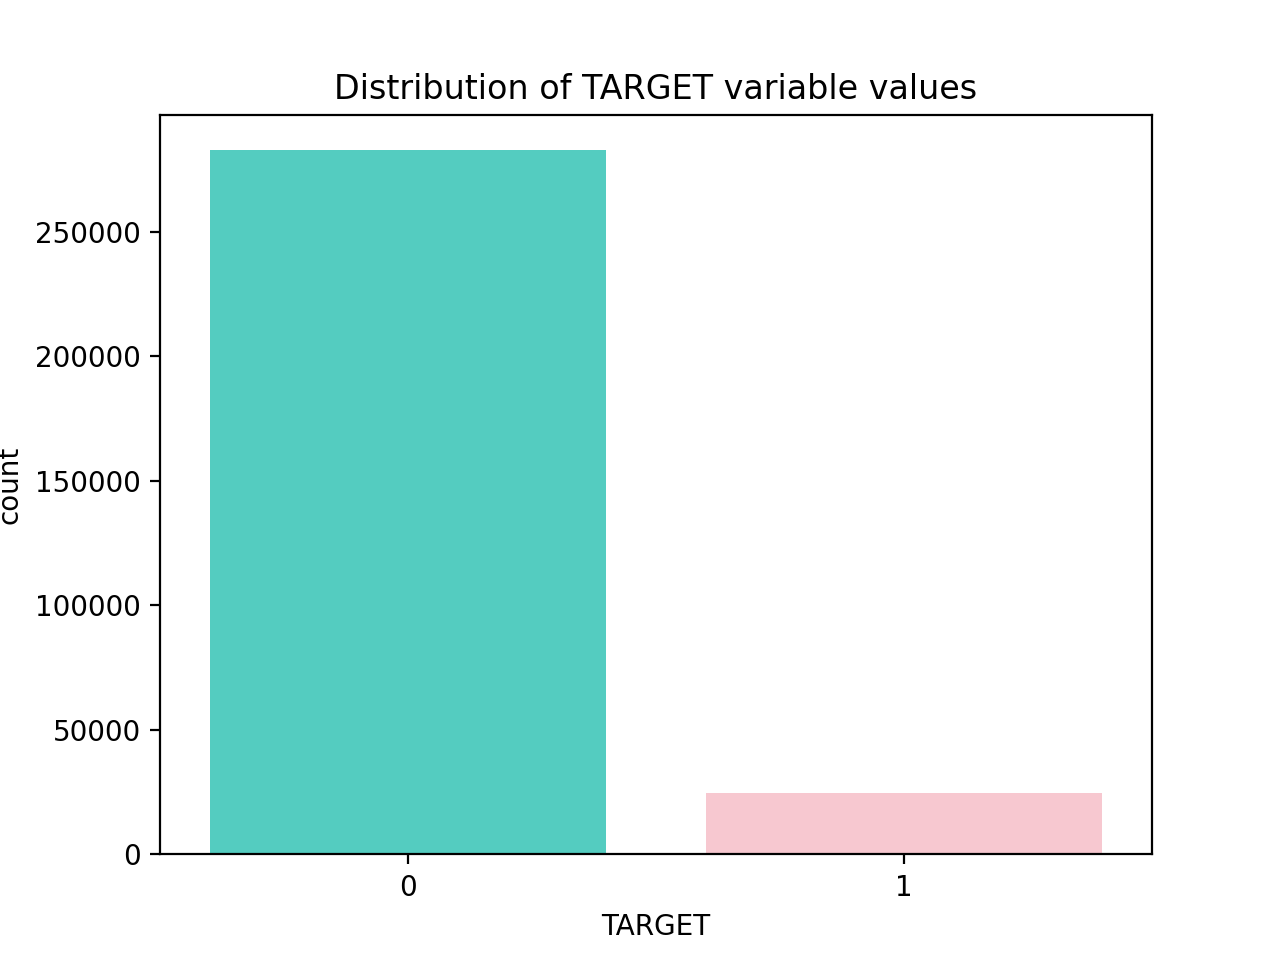

In [8]:
plt.title('Distribution of TARGET variable values')
sns.countplot(x=Train_data.TARGET, palette= ["#40E0D0", "pink"]);

In [9]:
# checking for missing values
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


Count  Percentage
COMMONAREA_MEDI           214865   69.872297
COMMONAREA_AVG            214865   69.872297
COMMONAREA_MODE           214865   69.872297
NONLIVINGAPARTMENTS_MODE  213514   69.432963
NONLIVINGAPARTMENTS_AVG   213514   69.432963
NONLIVINGAPARTMENTS_MEDI  213514   69.432963
FONDKAPREMONT_MODE        210295   68.386172
LIVINGAPARTMENTS_MODE     210199   68.354953
LIVINGAPARTMENTS_AVG      210199   68.354953
LIVINGAPARTMENTS_MEDI     210199   68.354953
FLOORSMIN_AVG             208642   67.848630
FLOORSMIN_MODE            208642   67.848630
FLOORSMIN_MEDI            208642   67.848630
YEARS_BUILD_MEDI          204488   66.497784
YEARS_BUILD_MODE          204488   66.497784
YEARS_BUILD_AVG           204488   66.497784
OWN_CAR_AGE               202929   65.990810
LANDAREA_MEDI             182590   59.376738
LANDAREA_MODE             182590   59.376738
LANDAREA_AVG              182590   59.376738

Pre-proceesing of Data. These involved removing missing values,re-enginnering time series columns, converting categorical data to numerical and tranforming the data to the form we can use to obtain important features from Random forest

In [10]:
# drop missing data
Train_data = Train_data.dropna()

In [11]:
# checking if all missing values are gone
count = Train_data.isnull().sum().sort_values(ascending=False)
percentage = ((Train_data.isnull().sum()/len(Train_data)*100)).sort_values(ascending=False)
missing_application = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_application.head(20)

Count and percentage of missing values for top 20 columns:


Count  Percentage
SK_ID_CURR                        0         0.0
OBS_30_CNT_SOCIAL_CIRCLE          0         0.0
WALLSMATERIAL_MODE                0         0.0
TOTALAREA_MODE                    0         0.0
HOUSETYPE_MODE                    0         0.0
FONDKAPREMONT_MODE                0         0.0
NONLIVINGAREA_MEDI                0         0.0
NONLIVINGAPARTMENTS_MEDI          0         0.0
LIVINGAREA_MEDI                   0         0.0
LIVINGAPARTMENTS_MEDI             0         0.0
LANDAREA_MEDI                     0         0.0
FLOORSMIN_MEDI                    0         0.0
FLOORSMAX_MEDI                    0         0.0
ENTRANCES_MEDI                    0         0.0
ELEVATORS_MEDI                    0         0.0
COMMONAREA_MEDI                   0         0.0
YEARS_BUILD_MEDI                  0         0.0
YEARS_BEGINEXPLUATATION_MEDI      0         0.0
BASEMENTAREA_MEDI                 0         0.0
APARTMENTS_MEDI                   0         0.0

## Features selection.

In [12]:
# Removing column that has only one unique entry
empty_columns = []
for col in Train_data.columns:
    if len(Train_data[col].unique()) <=1:
        empty_columns.append(col)
    
print(f"There are {len(empty_columns)} columns with just 1 unique value")
print("Removing these from dataset")
Train_data = Train_data.drop(empty_columns, axis = 1)


There are 4 columns with just 1 unique value
Removing these from dataset


In [13]:
# features engineering
Train_data['DAYS_BIRTH'] = Train_data['DAYS_BIRTH']/-365
Train_data['DAYS_ID_PUBLISH'] = Train_data['DAYS_ID_PUBLISH']/-365
Train_data['DAYS_LAST_PHONE_CHANGE']= Train_data['DAYS_LAST_PHONE_CHANGE']/-365
Train_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
71       100083       0         Cash loans           M               Y   
124      100145       0         Cash loans           F               Y   
152      100179       0         Cash loans           F               N   
161      100190       0         Cash loans           M               N   
255      100295       1         Cash loans           M               N   

     CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
71              0          103500.0    573628.5      24435.0         463500.0   
124             1          202500.0    260725.5      16789.5         198000.0   
152             0          202500.0    675000.0      53329.5         675000.0   
161             0          162000.0    263686.5      24781.5         238500.0   
255             1          225000.0   1019205.0      31032.0         774000.0   

     ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
71   ...                0                0                0                0   
124  ...                0                0                0                0   
152  ...                0                0                0                0   
161  ...                0                0                0                0   
255  ...                1                0                0                0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
71                         0.0                        0.0   
124                        0.0                        0.0   
152                        0.0                        0.0   
161                        0.0                        0.0   
255                        0.0                        0.0   

     AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
71                          0.0                        0.0   
124                         0.0                        0.0   
152                         0.0                        1.0   
161                         0.0                        0.0   
255                         0.0                        6.0   

     AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
71                         0.0                         3.0  
124                        0.0                         3.0  
152                        0.0                         4.0  
161                        0.0                         3.0  
255                        0.0                         1.0  

[5 rows x 118 columns]

In [14]:
# Continous columns will be a good features to first consider for machine learning model
#extract continuous columns
numerical_cols = list(Train_data.select_dtypes(exclude='object').columns)

# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 79


In [15]:
# transform categorical data to numerical
object_cols = list(Train_data.select_dtypes('object').columns)
for i in object_cols:
    Train_data[i] = LabelEncoder().fit_transform(Train_data[i])
Train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_REALTY                 int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 118, dtype: object

In [19]:
#rnd_Train_data = Train_data[numerical_cols]

X = Train_data.drop('TARGET', axis = 1)
y = Train_data.TARGET

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [20]:
# Building random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes= 16, n_jobs=-1)
model_clf = rnd_clf.fit(X_train, y_train)

y_pred_rf = model_clf.predict(X_test)  

<IPython.core.display.Javascript object>


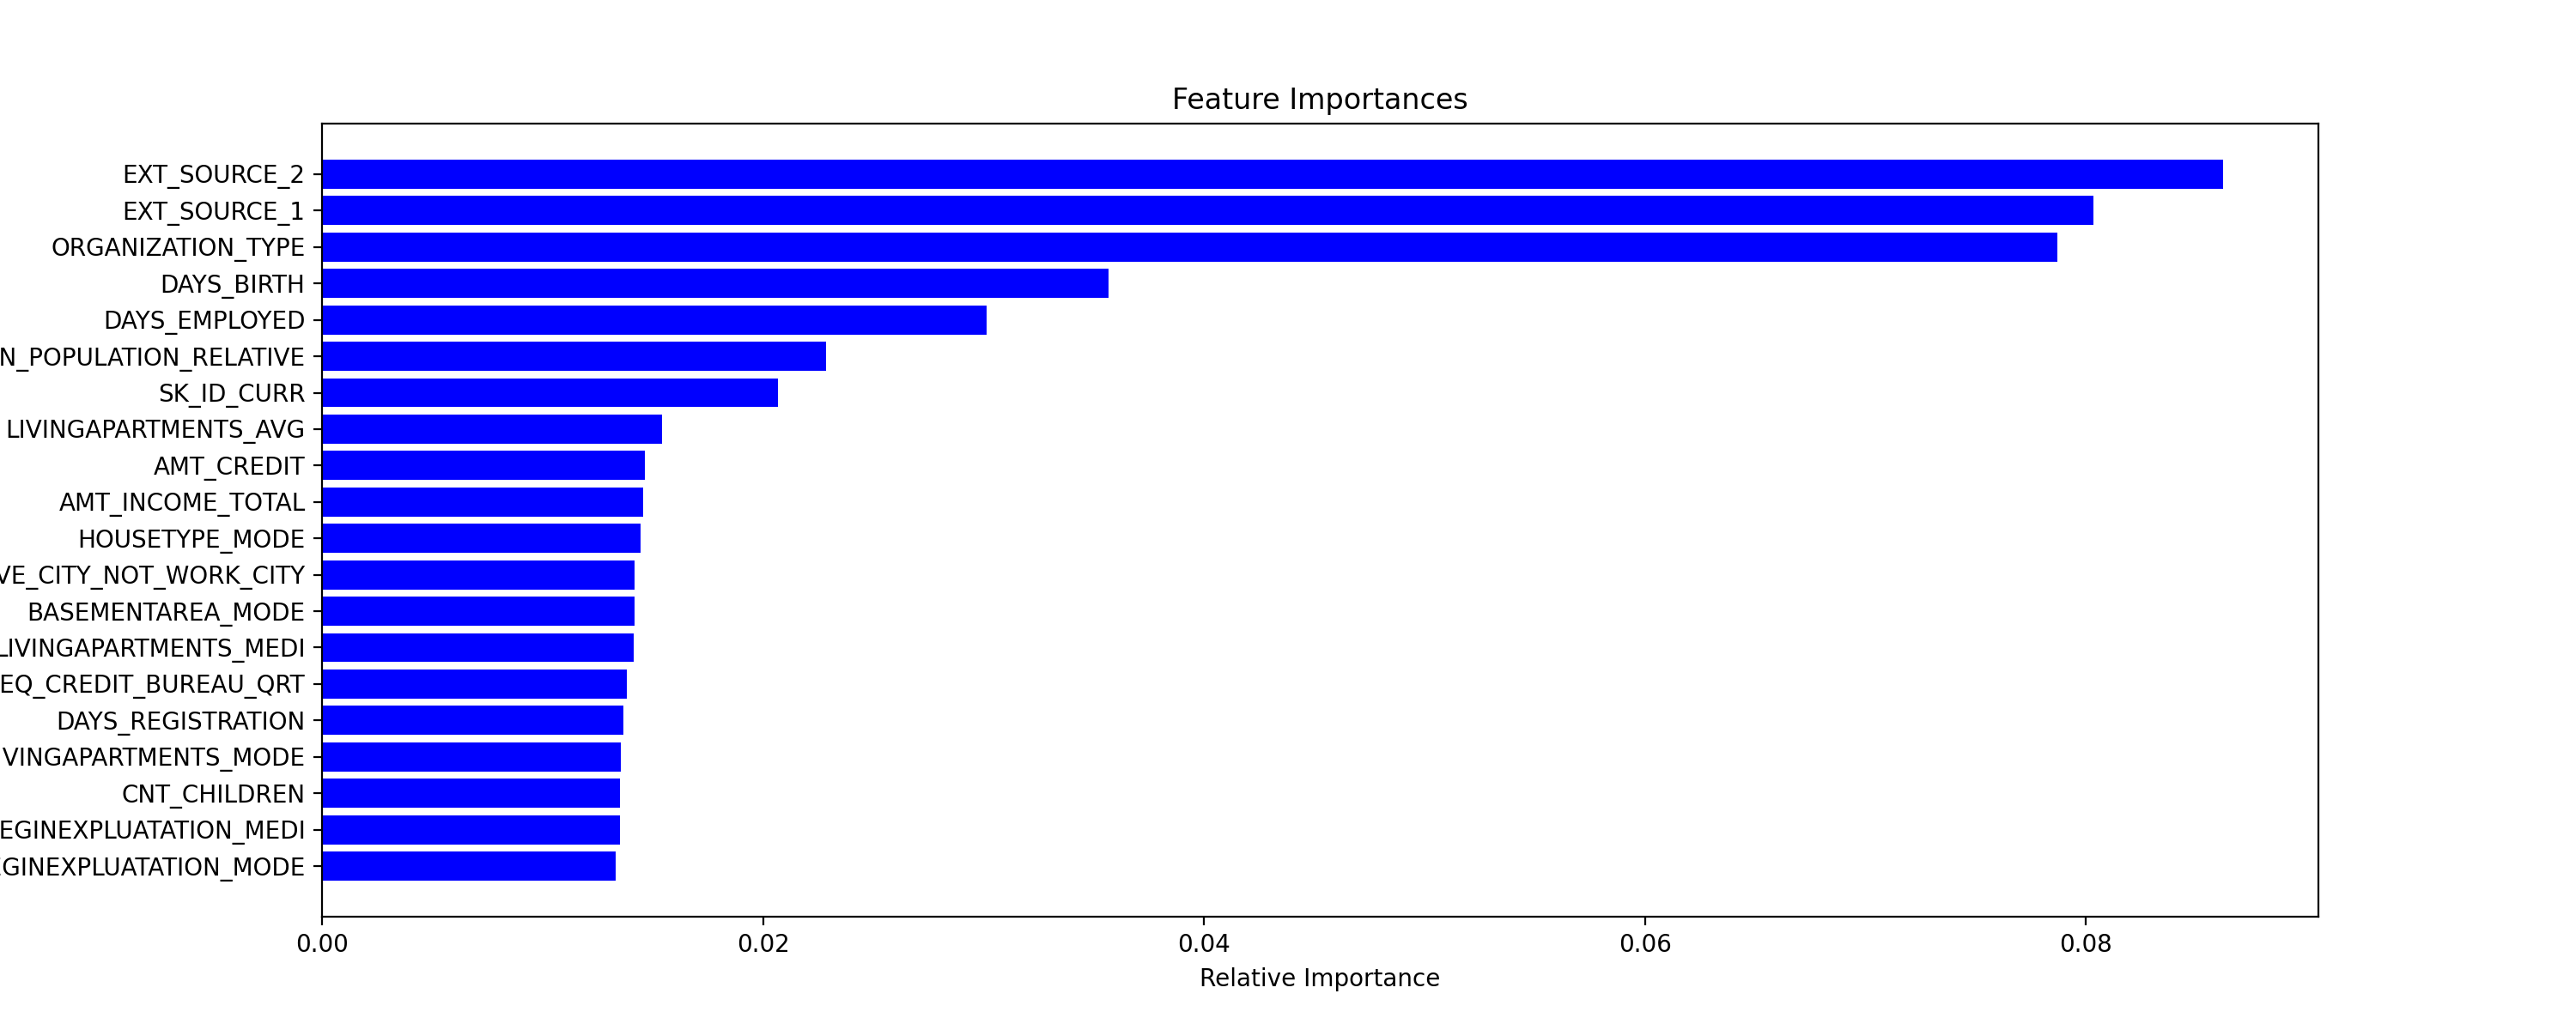

In [22]:
# extract important features from the random forest
# plot top ten important fearture in the random forest model
features = Train_data.columns
importances = model_clf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 20 

plt.figure(figsize=(15,6))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [127]:
# evaluate training model
def evaluate_model(model_pipeline):
    # prediction
    train_pred = model_pipeline.predict(X_Train_scaled)
    test_pred = model_pipeline.predict(X_Test_scaled)
    
    train_pred_proba = model_pipeline.predict_proba(X_Train_scaled)
    test_pred_proba = model_pipeline.predict_proba(X_Test_scaled)
    
    # evaluations
    print('Training & Validation ROC AUC Scores:\n', '-'*40)
    print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_pred_proba[:, 1])))
    print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_test, test_pred_proba[:, 1])))
    print('')
    print('Training & Validation Confusion Metrices:')
    print('Training   confusion matrix:\n', confusion_matrix(y_train, train_pred))
    print('Validation confusion matrix:\n', confusion_matrix(y_test, test_pred))

In [26]:
imp_features = list([features[i] for i in indices[-num_features:]])

In [27]:
# Build new data set with important features
n_Train_data = Train_data[imp_features]
n_Train_data["AMT_CREDIT"] = Train_data["AMT_CREDIT"]
n_Train_data["TARGET"] = Train_data["TARGET"]
n_Train_data.head()

YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI  CNT_CHILDREN  \
71                         0.9861                        0.9861             0   
124                        0.9801                        0.9801             1   
152                        0.9945                        0.9945             0   
161                        0.9891                        0.9891             0   
255                        0.9916                        0.9916             1   

     LIVINGAPARTMENTS_MODE  DAYS_REGISTRATION  AMT_REQ_CREDIT_BUREAU_QRT  \
71                  0.1304             -341.0                        0.0   
124                 0.0826             -762.0                        0.0   
152                 0.4683             -180.0                        0.0   
161                 0.2755             -464.0                        0.0   
255                 0.2121             -335.0                        0.0   

     LIVINGAPARTMENTS_MEDI  BASEMENTAREA_MODE  LIVE_CITY_NOT_WORK_CITY  \
71                  0.1214             0.1340                        0   
124                 0.0770             0.1038                        0   
152                 0.4361             0.4742                        0   
161                 0.2565             0.2047                        0   
255                 0.1975             0.1139                        0   

     HOUSETYPE_MODE  ...  AMT_CREDIT  LIVINGAPARTMENTS_AVG  SK_ID_CURR  \
71                0  ...    573628.5                0.1194      100083   
124               0  ...    260725.5                0.0756      100145   
152               0  ...    675000.0                0.4287      100179   
161               0  ...    263686.5                0.2522      100190   
255               0  ...   1019205.0                0.1942      100295   

     REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_BIRTH  ORGANIZATION_TYPE  \
71                     0.009657           -892   42.208219                  5   
124                    0.018850          -4375   44.608219                 41   
152                    0.031329          -2311   31.164384                 49   
161                    0.022625          -4472   38.279452                 11   
255                    0.072508           -602   31.112329                  5   

     EXT_SOURCE_1  EXT_SOURCE_2  TARGET  
71       0.270766      0.707126       0  
124      0.647045      0.746486       0  
152      0.674832      0.616156       0  
161      0.534999      0.585859       0  
255      0.262005      0.302394       1  

[5 rows x 21 columns]

<IPython.core.display.Javascript object>


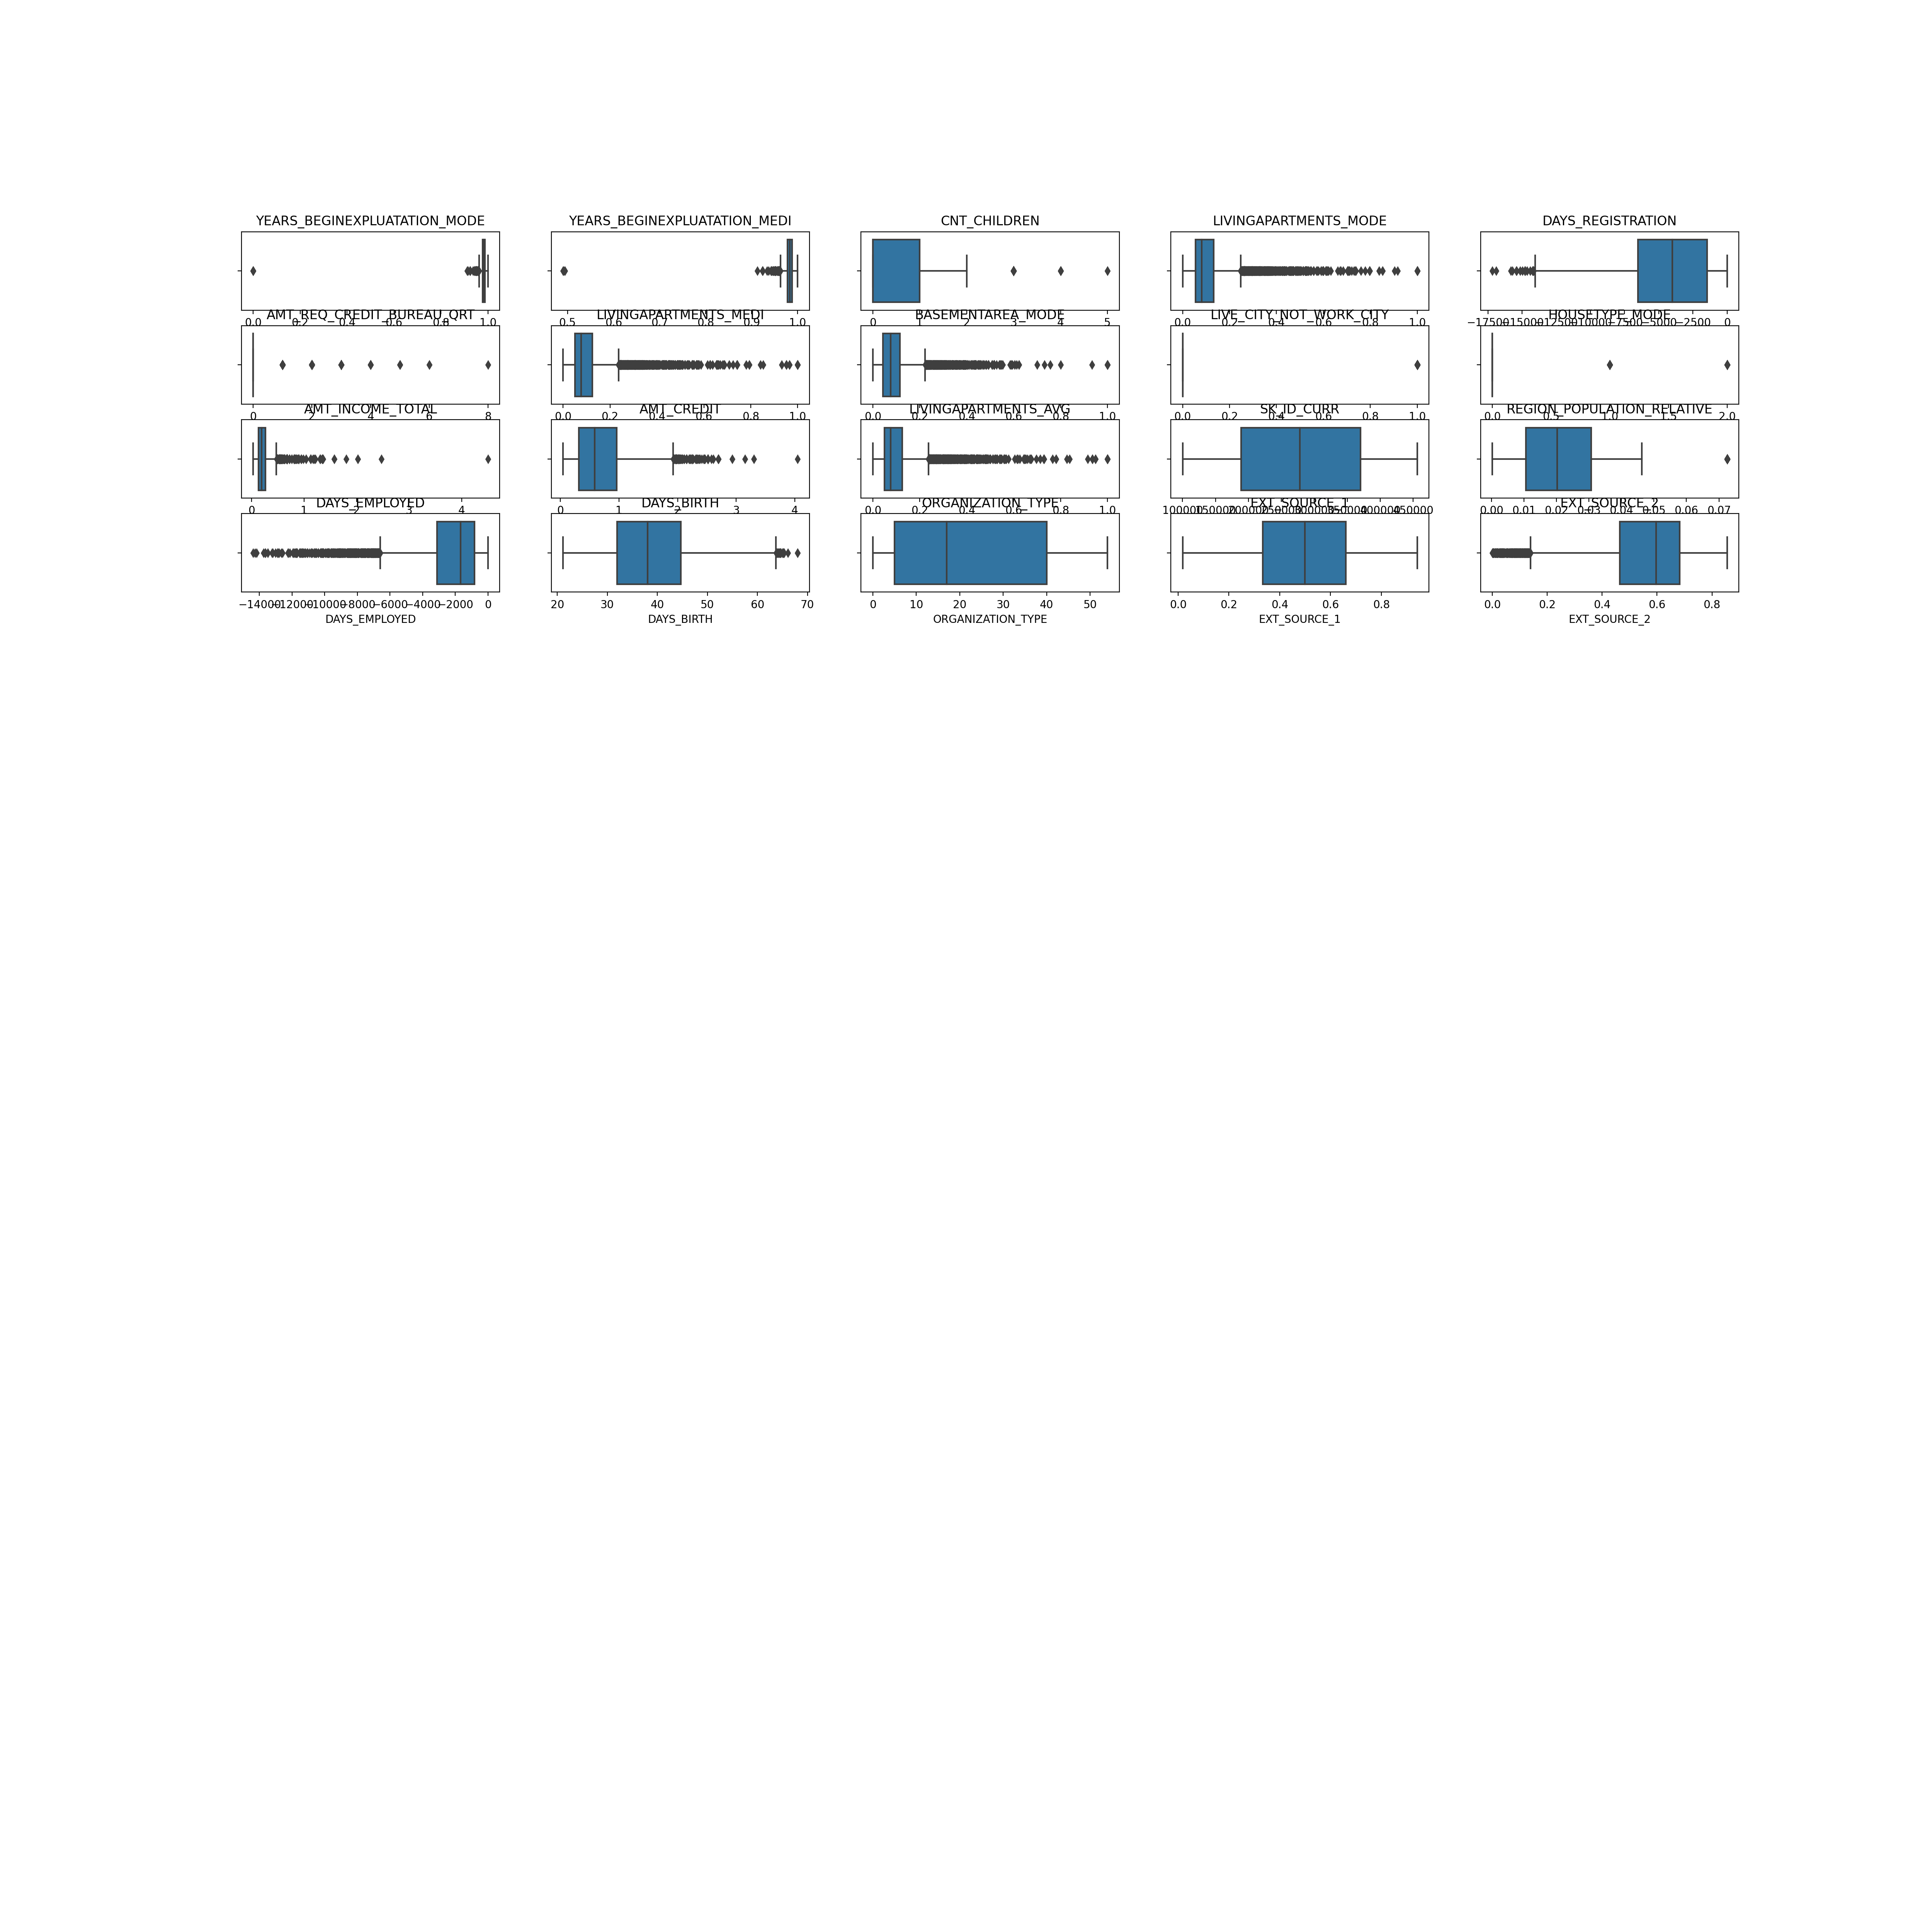

In [28]:
# Checking for possible outliers in the selected features
#draw boxplots for each continuous column
plt.figure(figsize=(25, 25))
for i, col in enumerate(imp_features):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=n_Train_data, x=col)
    plt.title(col)

### Further Features enginnering : which include income and days employed ratio/percentage, removing outliers from from Days_birth, income total and creating polynomial feratures for the five top important features.

In [118]:
Eng_Train_data = n_Train_data.copy()

In [119]:

# column represent the annuity/income percentage


Eng_Train_data['DAYS_EMPLOYED'] = Eng_Train_data['DAYS_EMPLOYED']/-365

# Days employed to Birth ratio
Eng_Train_data['Employed_to_Birth_Ratio'] = Eng_Train_data['DAYS_EMPLOYED']/Eng_Train_data['DAYS_BIRTH']

# credit to income ratio
Eng_Train_data['Credit_to_Income_Ratio'] = Eng_Train_data['AMT_CREDIT']/Eng_Train_data['AMT_INCOME_TOTAL']

# Average of External sources
Eng_Train_data['avg_external_source'] = (Eng_Train_data['EXT_SOURCE_1'] + Eng_Train_data['EXT_SOURCE_2']) / 2


# flag represents if he's greater than 32 or not
Eng_Train_data['Flag_Greater_32'] = Eng_Train_data['DAYS_BIRTH'].apply(lambda x: 1 if x > 32 else 0)

# flag represents if his employmeny years is greater than 5 or not
Eng_Train_data['Flag_Employment_Greater_5'] = Eng_Train_data['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 5 else 0)

# flag represents if his income is greater than the loan or not
Eng_Train_data['Flag_Income_Greater_Credit'] = Eng_Train_data['AMT_INCOME_TOTAL'] > Eng_Train_data['AMT_CREDIT']

# create polynomial features of the top 5 features with target
#cols = ['DAYS_BIRTH', 'LIVE_CITY_NOT_WORK_CITY',
       #'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED']

#for col in cols:
    #for i in [2,3]:
       # Eng_Train_data[f'{col}_power_{i}'] = Eng_Train_data[col] ** i



In [120]:

X = Eng_Train_data.drop('TARGET', axis = 1)
y = Eng_Train_data.TARGET

In [121]:
# Building Gradient boosting random forest model
# split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)



In [122]:
# Standarize data with StandarScaler
X_Train_scaled = MinMaxScaler().fit_transform(X_train)
X_Test_scaled = MinMaxScaler().fit_transform(X_test)
print(X_Train_scaled[0:5])

#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

[[0.95927964 0.91943785 0.2        0.0275     0.8267274  0.
  0.0257     0.         0.         0.         0.04282116 0.05977528
  0.0252     0.30680098 0.63599103 0.03277434 0.16124321 0.09259259
  0.33969449 0.85437715 0.06702933 0.0577169  0.58207404 0.
  0.         0.        ]
 [0.9915958  0.98337292 0.         0.0735     0.65558448 0.
  0.0684     0.0708     0.         0.         0.02267003 0.21348315
  0.0672     0.05500153 0.30927193 0.09978429 0.70911959 0.2037037
  0.86223877 0.8678313  0.10733574 0.32943133 0.87597099 1.
  0.         0.        ]
 [0.9845923  0.96951702 0.4        0.1846     0.48580218 0.5
  0.1719     0.1274     0.         0.         0.03274559 0.10720674
  0.1689     0.16055617 0.26047523 0.1281748  0.39948589 0.09259259
  0.38345189 0.87285483 0.18827951 0.12668573 0.61508633 1.
  1.         0.        ]
 [0.97318659 0.9469517  0.         0.034      0.78170847 0.
  0.0316     0.0727     0.         0.         0.02267003 0.09559775
  0.0311     0.47148823 0.491

In [129]:
# create gradient boosting model
#lgbm = LGBMClassifier(n_estimators=10, num_leaves=36, random_state=42)
lgbm = LGBMClassifier(n_estimators=100, max_depth=1, learning_rate=0.5, class_weight='balanced', num_leaves =42, random_state=22)

# train model
model3 = lgbm.fit(X_Train_scaled, y_train)

# evaluate model
evaluate_model(model3)

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8045
Validation roc auc score= 0.6787

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[3999 1652]
 [  90  280]]
Validation confusion matrix:
 [[1894  531]
 [  88   68]]


SUMMARY
Feature selection and enginnering improved the model performance 65% to 80% following gradient boosting random forest model. However, this model is not perfect yet due to likelihood of hyperparameters, as auc score for validation is significantly deferent from the training model.